Project: /overview/_project.yaml
Book: /overview/_book.yaml

<link rel="stylesheet" href="/site-assets/css/style.css">

<!-- DO NOT EDIT! Automatically generated file. -->


{% comment %}
The source of truth file can be found [here]: http://google3/zz
{% endcomment %}

<div itemscope itemtype="http://developers.google.com/ReferenceObject">
<meta itemprop="name" content="tf.data: TensorFlow 入力パイプラインの構築" />
<meta itemprop="path" content="Guide & Tutorials" />
<meta itemprop="property" content="tf.Variable"/>
<meta itemprop="property" content="tf.cast"/>
<meta itemprop="property" content="tf.data.Dataset"/>
<meta itemprop="property" content="tf.data.TFRecordDataset"/>
<meta itemprop="property" content="tf.data.TextLineDataset"/>
<meta itemprop="property" content="tf.data.experimental.Counter"/>
<meta itemprop="property" content="tf.data.experimental.CsvDataset"/>
<meta itemprop="property" content="tf.data.experimental.make_csv_dataset"/>
<meta itemprop="property" content="tf.fill"/>
<meta itemprop="property" content="tf.image.convert_image_dtype"/>
<meta itemprop="property" content="tf.image.resize"/>
<meta itemprop="property" content="tf.io.FixedLenFeature"/>
<meta itemprop="property" content="tf.io.decode_jpeg"/>
<meta itemprop="property" content="tf.io.decode_png"/>
<meta itemprop="property" content="tf.io.parse_example"/>
<meta itemprop="property" content="tf.io.read_file"/>
<meta itemprop="property" content="tf.keras.Sequential"/>
<meta itemprop="property" content="tf.keras.datasets.fashion_mnist.load_data"/>
<meta itemprop="property" content="tf.keras.layers.Dense"/>
<meta itemprop="property" content="tf.keras.layers.Flatten"/>
<meta itemprop="property" content="tf.keras.losses.SparseCategoricalCrossentropy"/>
<meta itemprop="property" content="tf.keras.preprocessing.image.ImageDataGenerator"/>
<meta itemprop="property" content="tf.keras.utils.get_file"/>
<meta itemprop="property" content="tf.math.not_equal"/>
<meta itemprop="property" content="tf.math.reduce_sum"/>
<meta itemprop="property" content="tf.py_function"/>
<meta itemprop="property" content="tf.random.uniform"/>
<meta itemprop="property" content="tf.sparse.SparseTensor"/>
<meta itemprop="property" content="tf.stack"/>
<meta itemprop="property" content="tf.strings.split"/>
<meta itemprop="property" content="tf.strings.substr"/>
<meta itemprop="property" content="tf.train.Checkpoint"/>
<meta itemprop="property" content="tf.train.CheckpointManager"/>
<meta itemprop="property" content="tf.train.Example"/>
</div>

# tf.data: TensorFlow 入力パイプラインの構築

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/guide/data"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org で表示</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ja/guide/data.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colabで実行</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ja/guide/data.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHubでソースを表示</a></td>
  <td>     <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ja/guide/data.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">ノートブックをダウンロード</a> </td>
</table>

<a href="https://www.tensorflow.org/api_docs/python/tf/data"><code>tf.data</code></a> API を使用すると、単純で再利用可能なピースから複雑な入力パイプラインを構築することができます。たとえば、画像モデルのパイプラインでは、分散ファイルシステムのファイルからデータを集め、各画像にランダムな摂動を適用し、ランダムに選択された画像を訓練用のバッチとして統合することがあります。また、テキストモデルのパイプラインでは、未加工のテキストデータからシンボルを抽出し、そのシンボルをルックアップテーブルとともに埋め込み識別子に変換し、異なる長さのシーケンスをまとめてバッチ処理することもあります。<a href="https://www.tensorflow.org/api_docs/python/tf/data"><code>tf.data</code></a> API は、大量のデータを処理し、別のデータ形式から読み取り、こういった複雑な変換の実行を可能にします。

<a href="https://www.tensorflow.org/api_docs/python/tf/data"><code>tf.data</code></a> API は、要素のシーケンスを表す <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset"><code>tf.data.Dataset</code></a> 抽象を導入します。シーケンス内の各要素は 1 つ以上のコンポーネントで構成されています。たとえば、画像パイプラインの場合、要素は画像とそのラベルを表す一組のテンソルコンポーネントを持つ単一のトレーニングサンプルである場合があります。

データセットを作成するには、次の 2 つの方法があります。

- データ**ソース**によって、メモリまたは 1 つ以上のファイルに格納されたデータから `Dataset` を作成する。

- データ**変換**によって、1 つ以上の <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset"><code>tf.data.Dataset</code></a> オブジェクトからデータセットを作成する。

In [2]:
import tensorflow as tf

2022-12-14 20:07:49.196911: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-14 20:07:49.197008: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-14 20:07:49.197018: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [3]:
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)

## 基本的な仕組み

<a id="basic-mechanics"></a>

入力パイプラインを作成するには、データ*ソース*から着手する必要があります。たとえば、メモリ内のデータから `Dataset` を作成する場合、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensors"><code>tf.data.Dataset.from_tensors()</code></a> または <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices"><code>tf.data.Dataset.from_tensor_slices()</code></a> を使用できます。推奨される TFRecord 形式で入力データがファイル内に格納されている場合は、<a href="https://www.tensorflow.org/api_docs/python/tf/data/TFRecordDataset"><code>tf.data.TFRecordDataset()</code></a> を使用することもできます。

`Dataset` オブジェクトを作成したら、<code>tf.data.Dataset</code> オブジェクトに対してチェーンメソッド呼び出しを行い、新しい `Dataset` オブジェクトに<em>変換</em>することができます。たとえば、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map"><code>Dataset.map</code></a> などの要素ごとの変換を適用したり、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch"><code>Dataset.batch()</code></a> などの複数の要素に対する変換を適用したりすることができます。変換の全リストについては、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset"><code>tf.data.Dataset</code></a> のドキュメントをご覧ください。

`Dataset` オブジェクトは Python イテラブルです。そのため、for ループを使って、その要素を消費することができます。

In [4]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])
dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [5]:
for elem in dataset:
  print(elem.numpy())

8
3
0
8
2
1


または、`iter` を使って Python イテレータを明示的に作成し、`next` を使って要素を消費することもできます。

In [6]:
it = iter(dataset)

print(next(it).numpy())

8


また、`reduce` 変換を使ってデータセットの要素を消費することもできます。この場合、単一の結果を得るためにすべての要素が減らされます。次の例では、整数のデータセットの合計を計算するために `reduce` 変換を使用する方法を説明しています。

In [7]:
print(dataset.reduce(0, lambda state, value: state + value).numpy())

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


22


<!-- TODO(jsimsa): Talk about <a href="https://www.tensorflow.org/api_docs/python/tf/function"><code>tf.function</code></a> support. -->

<a id="dataset_structure"></a>

### データセットの構造

データセットは、要素ごとに同じ（ネスト）構造の*コンポーネント*を持つ一連の*要素*を生成し、構造の各コンポーネントは <a href="https://www.tensorflow.org/api_docs/python/tf/TypeSpec"><code>tf.TypeSpec</code></a> で表現可能な、<a href="https://www.tensorflow.org/api_docs/python/tf/Tensor"><code>tf.Tensor</code></a>、<a href="https://www.tensorflow.org/api_docs/python/tf/sparse/SparseTensor"><code>tf.sparse.SparseTensor</code></a>、<a href="https://www.tensorflow.org/api_docs/python/tf/RaggedTensor"><code>tf.RaggedTensor</code></a>、<a href="https://www.tensorflow.org/api_docs/python/tf/TensorArray"><code>tf.TensorArray</code></a>、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset"><code>tf.data.Dataset</code></a> など、あらゆる型を持つことができます。

要素の（ネスト）構造を表現するために使用される Python コンストラクトには、`tuple`、`dict`、`NamedTuple`、および `OrderedDict` があります。特に `list` は、データセット要素の構造を表現するコンストラクトとして有効ではありません。これは、初期の <a href="https://www.tensorflow.org/api_docs/python/tf/data"><code>tf.data</code></a> ユーザーに、`list` 入力（code7}tf.data.Dataset.from_tensors に渡される入力など）がテンソルとして自動的に圧縮されることと、`list` 出力（ユーザー定義関数の戻り値など）が `tuple` に強制されることを強く希望していたためです。その結果、`list` 入力を構造として扱う場合には `tuple` に変換し、単一コンポーネントの `list` 出力が必要な場合は <a href="https://www.tensorflow.org/api_docs/python/tf/stack"><code>tf.stack</code></a> を使って明示的に圧縮する必要があります。

各要素コンポーネントの型を検査するには、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#element_spec"><code>Dataset.element_spec</code></a> プロパティを使用できます。このプロパティは <code>tf.TypeSpec</code> オブジェクトの<em>ネストされた構造</em>を、要素の構造を一致させて返します。これは、単一のコンポーネント、コンポーネントのタプル、またはコンポーネントのネストされたタプルである場合があります。以下に例を示します。

In [8]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))

dataset1.element_spec

TensorSpec(shape=(10,), dtype=tf.float32, name=None)

In [9]:
dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random.uniform([4]),
    tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))

dataset2.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

In [10]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))

dataset3.element_spec

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

In [11]:
# Dataset containing a sparse tensor.
dataset4 = tf.data.Dataset.from_tensors(tf.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], dense_shape=[3, 4]))

dataset4.element_spec

SparseTensorSpec(TensorShape([3, 4]), tf.int32)

In [12]:
# Use value_type to see the type of value represented by the element spec
dataset4.element_spec.value_type

tensorflow.python.framework.sparse_tensor.SparseTensor

`Dataset` 変換では、あらゆる構造のデータセットがサポートされています。<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map"><code>Dataset.map</code></a> を使用し、各要素に関数を適用する <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#filter"><code>Dataset.filter</code></a> 変換を適用すると、要素の構造によって関数の引数が判定されます。

In [13]:
dataset1 = tf.data.Dataset.from_tensor_slices(
    tf.random.uniform([4, 10], minval=1, maxval=10, dtype=tf.int32))

dataset1

<TensorSliceDataset element_spec=TensorSpec(shape=(10,), dtype=tf.int32, name=None)>

In [14]:
for z in dataset1:
  print(z.numpy())

[4 2 1 2 3 1 6 3 7 9]
[3 2 1 3 8 8 5 8 6 1]
[1 6 7 4 2 6 4 6 5 1]
[3 3 1 1 4 4 3 7 4 5]


In [15]:
dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random.uniform([4]),
    tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))

dataset2

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.float32, name=None), TensorSpec(shape=(100,), dtype=tf.int32, name=None))>

In [16]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))

dataset3

<ZipDataset element_spec=(TensorSpec(shape=(10,), dtype=tf.int32, name=None), (TensorSpec(shape=(), dtype=tf.float32, name=None), TensorSpec(shape=(100,), dtype=tf.int32, name=None)))>

In [17]:
for a, (b,c) in dataset3:
  print('shapes: {a.shape}, {b.shape}, {c.shape}'.format(a=a, b=b, c=c))

shapes: (10,), (), (100,)
shapes: (10,), (), (100,)
shapes: (10,), (), (100,)
shapes: (10,), (), (100,)


## 入力データの読み取り

### NumPy 配列を消費する

その他の例については、[NumPy 配列を読み込む](../tutorials/load_data/numpy.ipynb)チュートリアルをご覧ください。

すべての入力データがメモリに収容できる場合、このデータから `Dataset` を作成するには、データを <a href="https://www.tensorflow.org/api_docs/python/tf/Tensor"><code>tf.Tensor</code></a> オブジェクトに変換してから <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices"><code>Dataset.from_tensor_slices</code></a> を使用するのが最も簡単な方法です。

In [18]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 [==============================] - 0s 0us/step


26421880/26421880 [==============================] - 0s 0us/step


5148/5148 [==============================] - 0s 0us/step


4422102/4422102 [==============================] - 0s 0us/step


In [19]:
images, labels = train
images = images/255

dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

注意: 上記のコードスニペットは、`features` 配列と `labels` 配列を <a href="https://www.tensorflow.org/api_docs/python/tf/constant"><code>tf.constant()</code></a> 演算として TesorFlow グラフに埋め込みます。これは小さなデータセットではうまく機能しますが、配列の内容が何度もコピーされるため、メモリを浪費してしまい、`tf.GraphDef` プロトコルバッファの 2GB 制限に達してしまう可能性があります。

### Python ジェネレータの消費

<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset"><code>tf.data.Dataset</code></a> として簡単に統合できるもう 1 つの一般的なデータソースは、Python ジェネレータです。

注意: 便利なアプローチではあるものの、これには移植性と拡張性の制限があります。ジェネレータを作成した Python プロセスで実行する必要があり、それでも、Python [GIL](https://en.wikipedia.org/wiki/Global_interpreter_lock) の制約を受けます。

In [20]:
def count(stop):
  i = 0
  while i<stop:
    yield i
    i += 1

In [21]:
for n in count(5):
  print(n)

0
1
2
3
4


<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_generator"><code>Dataset.from_generator</code></a> コンストラクタは Python ジェネレータを完全に機能する <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset"><code>tf.data.Dataset</code></a> に変換します。

このコンストラクタは、イテレータではなく、呼び出し可能オブジェクトを入力として取ります。このため、ジェネレータが最後に達するとそれを再開することができます。オプションで `args` 引数を取ることができ、呼び出し可能オブジェクトの引数として渡されます。

<a href="https://www.tensorflow.org/api_docs/python/tf/data"><code>tf.data</code></a> は内部で <a href="https://www.tensorflow.org/api_docs/python/tf/Graph"><code>tf.Graph</code></a> を構築するため `output_types` 引数は必須であり、グラフのエッジには、`tf.dtype` が必要です。

In [22]:
ds_counter = tf.data.Dataset.from_generator(count, args=[25], output_types=tf.int32, output_shapes = (), )

In [23]:
for count_batch in ds_counter.repeat().batch(10).take(10):
  print(count_batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]
[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]


`output_shapes` 引数は*必須*ではありませんが、多数の TensorFlow 演算では、不明な階数のテンソルはサポートされていないため、強く推奨されます。特定の軸の長さが不明または可変である場合は、`output_shapes` で `None` として設定してください。

また、`output_shapes` と `output_types` は、ほかのデータセットのメソッドと同じネスト規則に従うことに注意することが重要です。

以下は、この両方の側面を示すジェネレーターの例です。配列のタプルを返し、2 つ目の配列は、不明な長さを持つベクトルです。

In [24]:
def gen_series():
  i = 0
  while True:
    size = np.random.randint(0, 10)
    yield i, np.random.normal(size=(size,))
    i += 1

In [25]:
for i, series in gen_series():
  print(i, ":", str(series))
  if i > 5:
    break

0 : [ 0.7409  0.3397  1.8843 -1.2961  0.2102  1.3484  0.4372 -0.7075]
1 : [-1.1707 -0.4897 -2.199   0.9645  0.0484]
2 : [ 0.4623 -0.0047  2.1914  0.2398]
3 : [ 1.1306 -0.0496 -0.9583 -0.2671 -0.581 ]
4 : [2.2338 0.1837]
5 : []
6 : [-2.1564 -1.0084 -0.2449 -0.9891 -1.076  -1.475 ]


最初の出力は `int32` で、2 つ目は `float32` です。

最初の項目はスカラーの形状 `()` で、2 つ目は長さが不明なベクトルの形状 `(None,)` です。 

In [26]:
ds_series = tf.data.Dataset.from_generator(
    gen_series, 
    output_types=(tf.int32, tf.float32), 
    output_shapes=((), (None,)))

ds_series

<FlatMapDataset element_spec=(TensorSpec(shape=(), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

これで、通常の <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset"><code>tf.data.Dataset</code></a> のように使用できるようになりました。可変形状を持つデータセットをバッチ処理する場合は、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#padded_batch"><code>Dataset.padded_batch</code></a> を使用する必要があります。

In [27]:
ds_series_batch = ds_series.shuffle(20).padded_batch(10)

ids, sequence_batch = next(iter(ds_series_batch))
print(ids.numpy())
print()
print(sequence_batch.numpy())

[ 3  5  6  7 16 20 18  8 21 10]

[[-0.6778 -0.2034 -0.4009  2.0818  0.      0.      0.      0.    ]
 [ 0.1437  1.8941  0.2497  2.0107 -0.6815 -0.6957  1.0258  0.995 ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.    ]
 [-1.1085 -0.605  -0.5992  1.3269  0.      0.      0.      0.    ]
 [ 1.5216  2.0115  1.0403 -0.9945  0.      0.      0.      0.    ]
 [ 0.4148  0.6303 -1.1971  0.      0.      0.      0.      0.    ]
 [ 0.1335 -1.053  -0.1996  0.      0.      0.      0.      0.    ]
 [-0.9344 -0.5797 -0.5245  1.8443  0.7129 -1.0842 -0.3134 -1.1103]
 [ 0.4693  1.3824  0.156   0.7805 -0.0091 -0.527   0.      0.    ]
 [ 0.286   0.3921  0.0231  0.6478  0.9333  1.2589  0.9413  0.    ]]


より現実的な例として、<a href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator"><code>preprocessing.image.ImageDataGenerator</code></a> を <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset"><code>tf.data.Dataset</code></a> としてラップしてみましょう。

まず、データをダウンロードします。

In [28]:
flowers = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

228813984/228813984 [==============================] - 1s 0us/step


<a href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator"><code>image.ImageDataGenerator</code></a> を作成します。

In [29]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)

In [30]:
images, labels = next(img_gen.flow_from_directory(flowers))

Found 3670 images belonging to 5 classes.


In [31]:
print(images.dtype, images.shape)
print(labels.dtype, labels.shape)

float32 (32, 256, 256, 3)
float32 (32, 5)


In [32]:
ds = tf.data.Dataset.from_generator(
    lambda: img_gen.flow_from_directory(flowers), 
    output_types=(tf.float32, tf.float32), 
    output_shapes=([32,256,256,3], [32,5])
)

ds.element_spec

(TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(32, 5), dtype=tf.float32, name=None))

In [33]:
for images, labels in ds.take(1):
  print('images.shape: ', images.shape)
  print('labels.shape: ', labels.shape)


Found 3670 images belonging to 5 classes.


images.shape:  (32, 256, 256, 3)
labels.shape:  (32, 5)


### TFRecord データの消費

エンドツーエンドの例については、[TFRcords を読み込む](../tutorials/load_data/tfrecord.ipynb)チュートリアルをご覧ください。

<a href="https://www.tensorflow.org/api_docs/python/tf/data"><code>tf.data</code></a> API では多様なファイル形式がサポートされているため、メモリに収まらない大規模なデータセットを処理することができます。たとえば、TFRecord ファイル形式は、単純なレコード指向のバイナリー形式で、多くの TensorFlow アプリケーションでデータの訓練に使用されています。<a href="https://www.tensorflow.org/api_docs/python/tf/data/TFRecordDataset"><code>tf.data.TFRecordDataset</code></a> クラスでは、入力パイプラインの一部として 1 つ以上の TFRecord ファイルの内容をストリーミングすることができます。

以下の例では、French Street Name Signs（FSNS）から取得したテストファイルを使用しています。

In [34]:
# Creates a dataset that reads all of the examples from two files.
fsns_test_file = tf.keras.utils.get_file("fsns.tfrec", "https://storage.googleapis.com/download.tensorflow.org/data/fsns-20160927/testdata/fsns-00000-of-00001")

7904079/7904079 [==============================] - 0s 0us/step


`TFRecordDataset` イニシャライザの `filenames` 引数は、文字列、文字列のリスト、または文字列の <a href="https://www.tensorflow.org/api_docs/python/tf/Tensor"><code>tf.Tensor</code></a> のいずれかです。そのため、訓練と検証プロセスに使用するファイルが 2 セットある場合、入力引数として filenames を取って、データセットを生成するファクトリーメソッドを作成することができます。

In [35]:
dataset = tf.data.TFRecordDataset(filenames = [fsns_test_file])
dataset

<TFRecordDatasetV2 element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

多数の TensorFlow プロジェクトは、TFRecord ファイルでシリアル化された <a href="https://www.tensorflow.org/api_docs/python/tf/train/Example"><code>tf.train.Example</code></a> レコードを使用します。これらのレコードは、検査前にデコードされている必要があります。

In [36]:
raw_example = next(iter(dataset))
parsed = tf.train.Example.FromString(raw_example.numpy())

parsed.features.feature['image/text']

bytes_list {
  value: "Rue Perreyon"
}

### テキストデータの消費

エンドツーエンドの例については、[テキストを読み込む](../tutorials/load_data/text.ipynb)チュートリアルをご覧ください。

多くのデータセットは 1 つ以上のテキストファイルとして分散されていますが、<a href="https://www.tensorflow.org/api_docs/python/tf/data/TextLineDataset"><code>tf.data.TextLineDataset</code></a> を使用してそれらのファイルから簡単に行を抽出することができます。1 つ以上のファイル名を指定すると、`TextLineDataset` によって、ファイルの行ごとに 1 つの文字列値の要素が生成されます。

In [37]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name)
    for file_name in file_names
]

815980/815980 [==============================] - 0s 0us/step


809730/809730 [==============================] - 0s 0us/step


807992/807992 [==============================] - 0s 0us/step


In [38]:
dataset = tf.data.TextLineDataset(file_paths)

以下は、最初のファイルの数行です。

In [39]:
for line in dataset.take(5):
  print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"


b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'


複数のファイルの行を交互に抽出するには、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#interleave"><code>Dataset.interleave</code></a> を使用するとより簡単にファイルを混ぜ合わせて抽出できます。以下は、各変換の 1 行目から 3 行目です。

In [40]:
files_ds = tf.data.Dataset.from_tensor_slices(file_paths)
lines_ds = files_ds.interleave(tf.data.TextLineDataset, cycle_length=3)

for i, line in enumerate(lines_ds.take(9)):
  if i % 3 == 0:
    print()
  print(line.numpy())


b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b"\xef\xbb\xbfOf Peleus' son, Achilles, sing, O Muse,"
b'\xef\xbb\xbfSing, O goddess, the anger of Achilles son of Peleus, that brought'

b'His wrath pernicious, who ten thousand woes'
b'The vengeance, deep and deadly; whence to Greece'
b'countless ills upon the Achaeans. Many a brave soul did it send'

b"Caused to Achaia's host, sent many a soul"
b'Unnumbered ills arose; which many a soul'
b'hurrying down to Hades, and many a hero did it yield a prey to dogs and'


ファイルがヘッダー行で始まる場合やコメントが含まれている場合なども含め、`TextLineDataset` は、デフォルトで*各*ファイルの行を抽出しますが、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#skip"><code>Dataset.skip()</code></a> または <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#filter"><code>Dataset.filter()</code></a> 変換を使用することで、こういった行を取り除くことができます。以下では、最初の行をスキップし、フィルタをかけて生存者のみを検索しています。

In [41]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic_lines = tf.data.TextLineDataset(titanic_file)

30874/30874 [==============================] - 0s 0us/step


In [42]:
for line in titanic_lines.take(10):
  print(line.numpy())

b'survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone'
b'0,male,22.0,1,0,7.25,Third,unknown,Southampton,n'
b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n'
b'1,female,26.0,0,0,7.925,Third,unknown,Southampton,y'
b'1,female,35.0,1,0,53.1,First,C,Southampton,n'
b'0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y'
b'0,male,2.0,3,1,21.075,Third,unknown,Southampton,n'
b'1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n'
b'1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n'
b'1,female,4.0,1,1,16.7,Third,G,Southampton,n'


In [43]:
def survived(line):
  return tf.not_equal(tf.strings.substr(line, 0, 1), "0")

survivors = titanic_lines.skip(1).filter(survived)

In [44]:
for line in survivors.take(10):
  print(line.numpy())

b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n'
b'1,female,26.0,0,0,7.925,Third,unknown,Southampton,y'
b'1,female,35.0,1,0,53.1,First,C,Southampton,n'
b'1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n'
b'1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n'
b'1,female,4.0,1,1,16.7,Third,G,Southampton,n'
b'1,male,28.0,0,0,13.0,Second,unknown,Southampton,y'
b'1,female,28.0,0,0,7.225,Third,unknown,Cherbourg,y'
b'1,male,28.0,0,0,35.5,First,A,Southampton,y'
b'1,female,38.0,1,5,31.3875,Third,unknown,Southampton,n'


### CSV データの消費

その他の例については、[CSV ファイルを読み込む](../tutorials/load_data/csv.ipynb)チュートリアルと[Pandas DataFrames を読み込む](../tutorials/load_data/pandas_dataframe.ipynb)チュートリアルをご覧ください。

CSV ファイル形式は、表形式のデータをプレーンテキストで保管するために広く使用される形式です。

以下に例を示します。

In [45]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

In [46]:
df = pd.read_csv(titanic_file)
df.head()

survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y

データがメモリに収まる場合は、同じ <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices"><code>Dataset.from_tensor_slices</code></a> メソッドを辞書に使用し、このデータをインポートしやすくすることができます。

In [47]:
titanic_slices = tf.data.Dataset.from_tensor_slices(dict(df))

for feature_batch in titanic_slices.take(1):
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))

  'survived'          : 0
  'sex'               : b'male'
  'age'               : 22.0
  'n_siblings_spouses': 1
  'parch'             : 0
  'fare'              : 7.25
  'class'             : b'Third'
  'deck'              : b'unknown'
  'embark_town'       : b'Southampton'
  'alone'             : b'n'


さらに拡張性の高い手法として、必要に応じてディスクから読み込むことができます。

<a href="https://www.tensorflow.org/api_docs/python/tf/data"><code>tf.data</code></a> モジュールには、[RFC 4180](https://tools.ietf.org/html/rfc4180) に準拠する 1 つ以上の CSV ファイルからレコードを抽出するメソッドがあります。

<a href="https://www.tensorflow.org/api_docs/python/tf/data/experimental/make_csv_dataset"><code>tf.data.experimental.make_csv_dataset</code></a> 関数は、一連の CSV ファイルを読み取るための高度なインターフェースで、使用しやすいように、列の型推論や、バッチ処理とシャッフルといった多数の機能をサポートしています。

In [48]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, batch_size=4,
    label_name="survived")

In [49]:
for feature_batch, label_batch in titanic_batches.take(1):
  print("'survived': {}".format(label_batch))
  print("features:")
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))

'survived': [0 0 0 1]
features:
  'sex'               : [b'male' b'male' b'female' b'female']
  'age'               : [57. 35. 27. 31.]
  'n_siblings_spouses': [0 0 1 0]
  'parch'             : [0 0 0 2]
  'fare'              : [ 12.35     7.05    21.     164.8667]
  'class'             : [b'Second' b'Third' b'Second' b'First']
  'deck'              : [b'unknown' b'unknown' b'unknown' b'C']
  'embark_town'       : [b'Queenstown' b'Southampton' b'Southampton' b'Southampton']
  'alone'             : [b'y' b'y' b'n' b'n']


列のサブセットのみが必要である場合には、`select_columns` 引数を使用できます。

In [50]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, batch_size=4,
    label_name="survived", select_columns=['class', 'fare', 'survived'])

In [51]:
for feature_batch, label_batch in titanic_batches.take(1):
  print("'survived': {}".format(label_batch))
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))

'survived': [0 0 0 1]
  'fare'              : [10.5    13.     16.1    31.3875]
  'class'             : [b'Second' b'Second' b'Third' b'Third']


また、より細かい制御を行えるように、<a href="https://www.tensorflow.org/api_docs/python/tf/data/experimental/CsvDataset"><code>experimental.CsvDataset</code></a> という下位クラスもあります。列の型推論はサポートされていないため、各列の型を指定する必要があります。

In [52]:
titanic_types  = [tf.int32, tf.string, tf.float32, tf.int32, tf.int32, tf.float32, tf.string, tf.string, tf.string, tf.string]
dataset = tf.data.experimental.CsvDataset(titanic_file, titanic_types , header=True)

for line in dataset.take(10):
  print([item.numpy() for item in line])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 38.0, 1, 0, 71.2833, b'First', b'C', b'Cherbourg', b'n']
[1, b'female', 26.0, 0, 0, 7.925, b'Third', b'unknown', b'Southampton', b'y']
[1, b'female', 35.0, 1, 0, 53.1, b'First', b'C', b'Southampton', b'n']
[0, b'male', 28.0, 0, 0, 8.4583, b'Third', b'unknown', b'Queenstown', b'y']
[0, b'male', 2.0, 3, 1, 21.075, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 27.0, 0, 2, 11.1333, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 14.0, 1, 0, 30.0708, b'Second', b'unknown', b'Cherbourg', b'n']
[1, b'female', 4.0, 1, 1, 16.7, b'Third', b'G', b'Southampton', b'n']
[0, b'male', 20.0, 0, 0, 8.05, b'Third', b'unknown', b'Southampton', b'y']


この下位インターフェースでは、一部の列が空である場合に、列の型の代わりに使用するデフォルト値を指定することができます。

In [53]:
%%writefile missing.csv
1,2,3,4
,2,3,4
1,,3,4
1,2,,4
1,2,3,
,,,

Writing missing.csv


In [54]:
# Creates a dataset that reads all of the records from two CSV files, each with
# four float columns which may have missing values.

record_defaults = [999,999,999,999]
dataset = tf.data.experimental.CsvDataset("missing.csv", record_defaults)
dataset = dataset.map(lambda *items: tf.stack(items))
dataset

<MapDataset element_spec=TensorSpec(shape=(4,), dtype=tf.int32, name=None)>

In [55]:
for line in dataset:
  print(line.numpy())

[1 2 3 4]
[999   2   3   4]
[  1 999   3   4]
[  1   2 999   4]
[  1   2   3 999]
[999 999 999 999]


デフォルトでは、`CsvDataset` はファイルの*すべて*の行の*すべて*の列を生成するようになっていますが、ファイルが無視すべきヘッダー行で開始している場合や、入力に不要な列がある場合など、このデフォルトの動作が望ましくないことがあります。こういった行とフィールドについては、それぞれ  `header` 引数と `select_cols` 引数を使用することで取り除くことができます。

In [56]:
# Creates a dataset that reads all of the records from two CSV files with
# headers, extracting float data from columns 2 and 4.
record_defaults = [999, 999] # Only provide defaults for the selected columns
dataset = tf.data.experimental.CsvDataset("missing.csv", record_defaults, select_cols=[1, 3])
dataset = dataset.map(lambda *items: tf.stack(items))
dataset

<MapDataset element_spec=TensorSpec(shape=(2,), dtype=tf.int32, name=None)>

In [57]:
for line in dataset:
  print(line.numpy())

[2 4]
[2 4]
[999   4]
[2 4]
[  2 999]
[999 999]


### ファイルのセットの消費

多くのデータセットは一連のファイルセットとして分散されており、各ファイルは 1 つの例です。

In [58]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)
flowers_root = pathlib.Path(flowers_root)


注意: これらの画像のライセンスは CC-BY に帰属します。詳細は、LICENSE.txt を参照してください。

ルートディレクトリには、各クラスのディレクトリが含まれます。

In [59]:
for item in flowers_root.glob("*"):
  print(item.name)

daisy
sunflowers
LICENSE.txt
dandelion
tulips
roses


各クラスディレクトリのファイルは例です。

In [60]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

for f in list_ds.take(5):
  print(f.numpy())

b'/home/kbuilder/.keras/datasets/flower_photos/sunflowers/6239758929_50e5e5a476_m.jpg'
b'/home/kbuilder/.keras/datasets/flower_photos/tulips/17189526216_fa24dd541a_n.jpg'
b'/home/kbuilder/.keras/datasets/flower_photos/sunflowers/8292914969_4a76608250_m.jpg'
b'/home/kbuilder/.keras/datasets/flower_photos/dandelion/2326334426_2dc74fceb1.jpg'
b'/home/kbuilder/.keras/datasets/flower_photos/roses/1667199972_7ba7d999c1_m.jpg'


<a href="https://www.tensorflow.org/api_docs/python/tf/io/read_file"><code>tf.io.read_file</code></a> 関数を使用してデータを読み取り、パスからラベルを抽出して `(image, label)` のペアを返します。

In [61]:
def process_path(file_path):
  label = tf.strings.split(file_path, os.sep)[-2]
  return tf.io.read_file(file_path), label

labeled_ds = list_ds.map(process_path)

In [62]:
for image_raw, label_text in labeled_ds.take(1):
  print(repr(image_raw.numpy()[:100]))
  print()
  print(label_text.numpy())

b"\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe1\x0b\x82XMP\x00://ns.adobe.com/xap/1.0/\x00<?xpacket begin='\xef\xbb\xbf' id='W5M0MpCehiHzreSzNTczk"

b'tulips'


<!--
TODO(mrry): Add this section.

### Handling text data with unusual sizes
-->

## データセット要素のバッチ処理

### 単純なバッチ処理

最も単純なバッチ処理の形態は、`n` 個の連続するデータセット要素を 1 つの要素にスタックする方法です。<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch"><code>Dataset.batch()</code></a> 変換によってこれを実行することができますが、 <a href="https://www.tensorflow.org/api_docs/python/tf/stack"><code>tf.stack()</code></a> 演算子と同じ制約が伴い、要素の各コンポーネントに適用されます。つまり、各コンポーネント *i* に対し、すべての要素にまったく同じ形状のテンソルが必要です。

In [63]:
inc_dataset = tf.data.Dataset.range(100)
dec_dataset = tf.data.Dataset.range(0, -100, -1)
dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))
batched_dataset = dataset.batch(4)

for batch in batched_dataset.take(4):
  print([arr.numpy() for arr in batch])

[array([0, 1, 2, 3]), array([ 0, -1, -2, -3])]
[array([4, 5, 6, 7]), array([-4, -5, -6, -7])]
[array([ 8,  9, 10, 11]), array([ -8,  -9, -10, -11])]
[array([12, 13, 14, 15]), array([-12, -13, -14, -15])]


<a href="https://www.tensorflow.org/api_docs/python/tf/data"><code>tf.data</code></a> は形状情報を伝搬しようとしますが、最後のバッチがいっぱいになっていない可能性があるため、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch"><code>Dataset.batch</code></a> のデフォルト設定は不明なバッチサイズとなります。形状の `None` に注意してください。

In [64]:
batched_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

`drop_remainder` 引数を使用して最後のバッチを無視し、完全に形状を伝搬させます。

In [65]:
batched_dataset = dataset.batch(7, drop_remainder=True)
batched_dataset

<BatchDataset element_spec=(TensorSpec(shape=(7,), dtype=tf.int64, name=None), TensorSpec(shape=(7,), dtype=tf.int64, name=None))>

### パディングによるテンソルのバッチ処理

上記のレシピは、すべてのテンソルが同じサイズである場合に機能しますが、多くのモデル（シーケンスモデルなど）では、さまざまなサイズの入力データが使用されています（異なる長さのシーケンスなど）。このケースに対応するには、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#padded_batch"><code>Dataset.padded_batch</code></a> 変換を使い、パディングされている可能性のある 1 つ以上の次元を指定することで、異なる形状のテンソルをバッチ処理することができます。

In [66]:
dataset = tf.data.Dataset.range(100)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))
dataset = dataset.padded_batch(4, padded_shapes=(None,))

for batch in dataset.take(2):
  print(batch.numpy())
  print()


[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#padded_batch"><code>Dataset.padded_batch</code></a> 変換では、各コンポーネントに異なるパディングを設定できます。このパディングは可変長（上記の例では `None` で指定）または固定長です。また、パディング値をオーバーライドすることも可能で、その場合は、0 となります。

<!--
TODO(mrry): Add this section.

### Dense ragged -> tf.SparseTensor
-->

## トレーニングワークフロー

### 複数のエポックの処理

<a href="https://www.tensorflow.org/api_docs/python/tf/data"><code>tf.data</code></a> API では、同一のデータの複数のエポックを主に 2 つの方法で処理することができます。

複数のエポック内でデータセットをイテレートする最も簡単な方法は、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#repeat"><code>Dataset.repeat()</code></a> 変換を使用することです。まず、titanic データのデータセットを作成します。

In [67]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic_lines = tf.data.TextLineDataset(titanic_file)

In [68]:
def plot_batch_sizes(ds):
  batch_sizes = [batch.shape[0] for batch in ds]
  plt.bar(range(len(batch_sizes)), batch_sizes)
  plt.xlabel('Batch number')
  plt.ylabel('Batch size')

<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#repeat"><code>Dataset.repeat()</code></a> 変換を引数を使用せずに適用すると、入力が無限に繰り返されます。

<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#repeat"><code>Dataset.repeat</code></a> 変換は、1 つのエポックの最後と次のエポックの始まりを伝達することなく、その引数を連結します。このため、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#repeat"><code>Dataset.repeat</code></a> の後に適用される <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch"><code>Dataset.batch</code></a> は、エポックの境界をまたぐバッチを生成してしまいます。

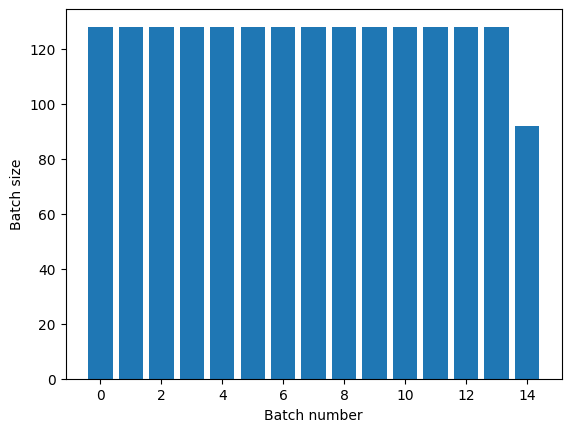

In [69]:
titanic_batches = titanic_lines.repeat(3).batch(128)
plot_batch_sizes(titanic_batches)

エポックを明確に分離する必要がある場合は、repeat の前に <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch"><code>Dataset.batch</code></a> を記述します。

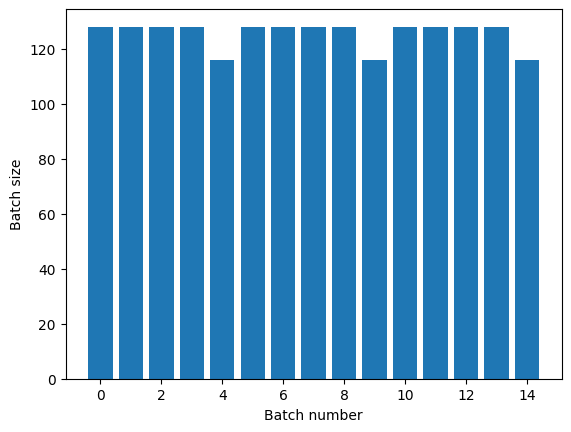

In [70]:
titanic_batches = titanic_lines.batch(128).repeat(3)

plot_batch_sizes(titanic_batches)

各エポックの最後にカスタム計算（統計の収集など）を実行する場合は、エポックごとにデータセットのイテレーションを再開することが最も簡単です。

In [71]:
epochs = 3
dataset = titanic_lines.batch(128)

for epoch in range(epochs):
  for batch in dataset:
    print(batch.shape)
  print("End of epoch: ", epoch)

(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  0
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  1
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  2


### 入力データのランダムシャッフル

<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle"><code>Dataset.shuffle()</code></a> 変換は、固定サイズのバッファを維持し、次の要素をそのバッファからランダムに均等して選択します。

注意: buffer_size が大きければより全体的にシャッフルされますが、メモリを多く消費し、より長い時間がかかる可能性があります。これが問題となる場合は、ファイル全体で <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#interleave"><code>Dataset.interleave</code></a> を使用することを検討してください。

効果を確認できるように、データセットにインデックスを追加します。

In [72]:
lines = tf.data.TextLineDataset(titanic_file)
counter = tf.data.experimental.Counter()

dataset = tf.data.Dataset.zip((counter, lines))
dataset = dataset.shuffle(buffer_size=100)
dataset = dataset.batch(20)
dataset

Instructions for updating:
Use `tf.data.Dataset.counter(...)` instead.


<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

`buffer_size` は 100 であり、バッチサイズは 20 であるため、最初のバッチには、120 を超えるインデックスの要素は含まれません。

In [73]:
n,line_batch = next(iter(dataset))
print(n.numpy())

[ 99   4  22  98  31  11  19  89  95  81  49  26  77  58 103  27 112  48
  96   8]


<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch"><code>Dataset.batch</code></a> と同様に、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#repeat"><code>Dataset.repeat</code></a> に対する順番は重要です。

<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle"><code>Dataset.shuffle</code></a> は、シャッフルのバッファが空になるまでエポックの最後をシグナルしません。そのため、repeat の後に記述される shuffle は、次のエポックに移動する前のエポックのすべての要素を表示します。

In [74]:
dataset = tf.data.Dataset.zip((counter, lines))
shuffled = dataset.shuffle(buffer_size=100).batch(10).repeat(2)

print("Here are the item ID's near the epoch boundary:\n")
for n, line_batch in shuffled.skip(60).take(5):
  print(n.numpy())

Here are the item ID's near the epoch boundary:

[597 622 519 428 598 609 319 565 620 548]
[542 517 508 420 563 552 575 173 608 626]
[213 490 605 603 307 579 498 585]
[80 70 12 39 36 50 33 35 82 99]
[66 55 34 38 23 32 51 49 75 43]


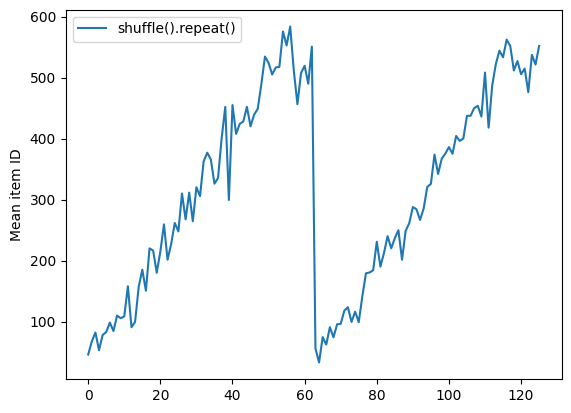

In [75]:
shuffle_repeat = [n.numpy().mean() for n, line_batch in shuffled]
plt.plot(shuffle_repeat, label="shuffle().repeat()")
plt.ylabel("Mean item ID")
plt.legend()

ただし、shuffle の前の repeat によって、エポックの境界が混合されてしまいます。

In [76]:
dataset = tf.data.Dataset.zip((counter, lines))
shuffled = dataset.repeat(2).shuffle(buffer_size=100).batch(10)

print("Here are the item ID's near the epoch boundary:\n")
for n, line_batch in shuffled.skip(55).take(15):
  print(n.numpy())

Here are the item ID's near the epoch boundary:

[602 614  22 564 594 583 450 375 526 568]
[ 14 577   8 547 610 520  28  32 599 471]
[ 24 490  37 504   6 259 411 512 217 443]
[584 621  12  34 535 546 589  43  30  45]
[461  35  40 620  53 236 624  48  68 601]
[ 52 441  44 276  51  63 623 626 538 530]
[ 65   1  27  61 439 440   7 608  46  50]
[ 89 328 572  93  69 627  81  96  26  57]
[604  59  76 580 585 533  41  58 511  77]
[618  39 513 524 506 100  55 622  90  53]
[ 80 615 106 448 125 105  49  36  75 515]
[542 579 129 228  70  79 605  73  18 117]
[140 135 123  47  88  99  92 124   4 122]
[ 23  91  64  94 364  42 313 143 142 153]
[ 84 144 148 154  71  98 111 116 137  60]


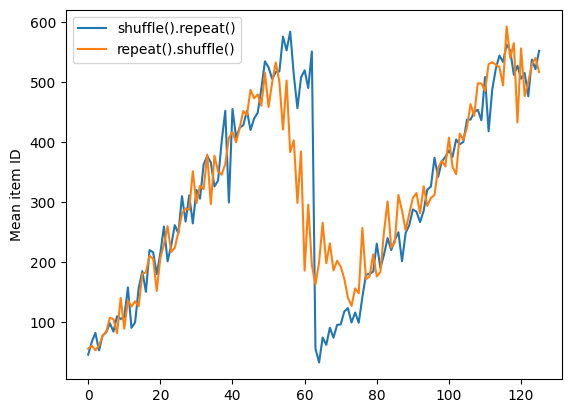

In [77]:
repeat_shuffle = [n.numpy().mean() for n, line_batch in shuffled]

plt.plot(shuffle_repeat, label="shuffle().repeat()")
plt.plot(repeat_shuffle, label="repeat().shuffle()")
plt.ylabel("Mean item ID")
plt.legend()

## データの前処理

<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map"><code>Dataset.map(f)</code></a> 変換は、指定された関数 `f` を入力データセットの各要素に適用します。これは、関数型プログラミング言語でリスト（およびその他の構造）に一般的に適用される [`map()`](https://en.wikipedia.org/wiki/Map_(higher-order_function)) 関数に基づきます。関数 `f` は、入力内の単一の要素を表す <a href="https://www.tensorflow.org/api_docs/python/tf/Tensor"><code>tf.Tensor</code></a> オブジェクトを取り、新しいデータセット内の単一の要素を表す <a href="https://www.tensorflow.org/api_docs/python/tf/Tensor"><code>tf.Tensor</code></a> オブジェクトを返します。この実装には、1 つの要素を別の要素に変換する標準的な TensorFlow 演算が使用されています。

このセクションでは、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map"><code>Dataset.map()</code></a> の一般的な使用例を説明します。

### 画像データのデコードとサイズ変更

<!-- TODO(markdaoust): link to image augmentation when it exists -->

実世界の画像データでニューラルネットワークを訓練する際、異なるサイズのデータを固定サイズでバッチ処理できるように、一般的なサイズに変換しなければならないことがよくあります。

花のファイル名のデータセットを再構築します。

In [78]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

データセットの要素を操作する関数を記述します。

In [79]:
# Reads an image from a file, decodes it into a dense tensor, and resizes it
# to a fixed shape.
def parse_image(filename):
  parts = tf.strings.split(filename, os.sep)
  label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [128, 128])
  return image, label

これが機能するかをテストします。

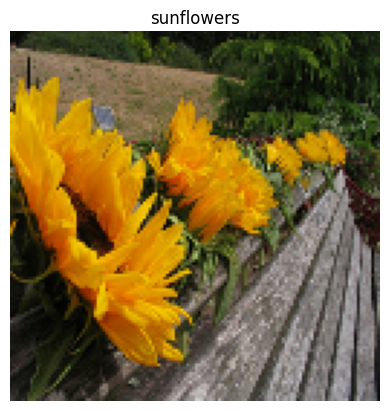

In [80]:
file_path = next(iter(list_ds))
image, label = parse_image(file_path)

def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy().decode('utf-8'))
  plt.axis('off')

show(image, label)

それをデータセットにマッピングします。

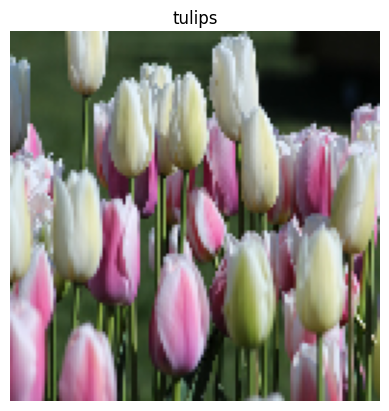

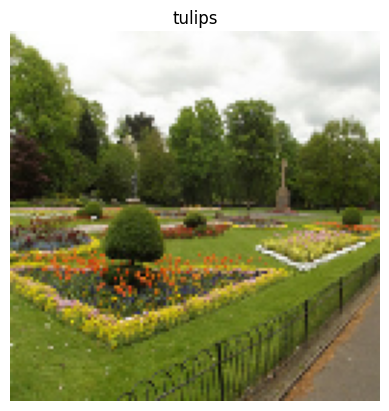

In [81]:
images_ds = list_ds.map(parse_image)

for image, label in images_ds.take(2):
  show(image, label)

### 任意の Python ロジックの適用

パフォーマンスの理由により、データの前処理には可能な限り TensorFlow 演算を使用してください。ただし、入力データを解析する際は、外部の Python ライブラリを呼び出すと便利な場合があります。<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map"><code>Dataset.map</code></a> 変換で、<a href="https://www.tensorflow.org/api_docs/python/tf/py_function"><code>tf.py_function</code></a> 演算を使用することができます。

たとえば、ランダムな回転を適用する場合、<a href="https://www.tensorflow.org/api_docs/python/tf/image"><code>tf.image</code></a> モジュールには <a href="https://www.tensorflow.org/api_docs/python/tf/image/rot90"><code>tf.image.rot90</code></a> しかないため、画像を拡張するにはあまり便利とは言えません。

注意: `tensorflow_addons` には、`tensorflow_addons.image.rotate` というように、TensorFlow と互換性のある `rotate` があります。

<a href="https://www.tensorflow.org/api_docs/python/tf/py_function"><code>tf.py_function</code></a> の動作を実演するために、`scipy.ndimage.rotate` 関数を代わりに使用してみましょう。

In [82]:
import scipy.ndimage as ndimage

def random_rotate_image(image):
  image = ndimage.rotate(image, np.random.uniform(-30, 30), reshape=False)
  return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


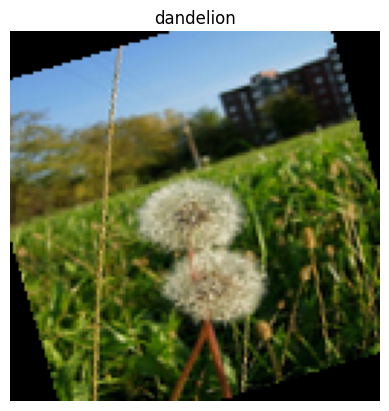

In [83]:
image, label = next(iter(images_ds))
image = random_rotate_image(image)
show(image, label)

この関数を <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map"><code>Dataset.map</code></a> と使用する場合、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_generator"><code>Dataset.from_generator</code></a> と同じ警告が適用されるため、関数を適用する際に、戻される形状と型を記述する必要があります。

In [84]:
def tf_random_rotate_image(image, label):
  im_shape = image.shape
  [image,] = tf.py_function(random_rotate_image, [image], [tf.float32])
  image.set_shape(im_shape)
  return image, label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


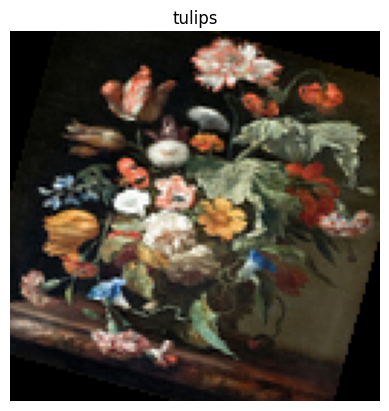

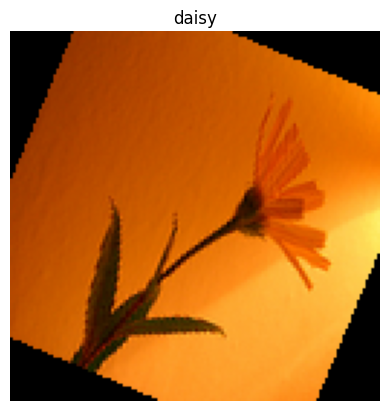

In [85]:
rot_ds = images_ds.map(tf_random_rotate_image)

for image, label in rot_ds.take(2):
  show(image, label)

### `tf.Example` プロトコルバッファメッセージの解析

多くの入力パイプラインは、TFRecord 形式から <a href="https://www.tensorflow.org/api_docs/python/tf/train/Example"><code>tf.train.Example</code></a> プロトコルバッファメッセージを抽出します。各 <a href="https://www.tensorflow.org/api_docs/python/tf/train/Example"><code>tf.train.Example</code></a> レコードには、1 つ以上の「特徴量」が含まれており、入力パイプラインは通常、これらの特徴量をテンソルに変換します。

In [86]:
fsns_test_file = tf.keras.utils.get_file("fsns.tfrec", "https://storage.googleapis.com/download.tensorflow.org/data/fsns-20160927/testdata/fsns-00000-of-00001")
dataset = tf.data.TFRecordDataset(filenames = [fsns_test_file])
dataset

<TFRecordDatasetV2 element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

データを理解するには、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset"><code>tf.data.Dataset</code></a> の外部で <a href="https://www.tensorflow.org/api_docs/python/tf/train/Example"><code>tf.train.Example</code></a> プロトコルを処理することができます。

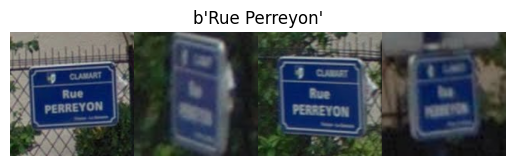

In [87]:
raw_example = next(iter(dataset))
parsed = tf.train.Example.FromString(raw_example.numpy())

feature = parsed.features.feature
raw_img = feature['image/encoded'].bytes_list.value[0]
img = tf.image.decode_png(raw_img)
plt.imshow(img)
plt.axis('off')
_ = plt.title(feature["image/text"].bytes_list.value[0])

In [88]:
raw_example = next(iter(dataset))

In [89]:
def tf_parse(eg):
  example = tf.io.parse_example(
      eg[tf.newaxis], {
          'image/encoded': tf.io.FixedLenFeature(shape=(), dtype=tf.string),
          'image/text': tf.io.FixedLenFeature(shape=(), dtype=tf.string)
      })
  return example['image/encoded'][0], example['image/text'][0]

In [90]:
img, txt = tf_parse(raw_example)
print(txt.numpy())
print(repr(img.numpy()[:20]), "...")

b'Rue Perreyon'
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X' ...


In [91]:
decoded = dataset.map(tf_parse)
decoded

<MapDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [92]:
image_batch, text_batch = next(iter(decoded.batch(10)))
image_batch.shape

TensorShape([10])

<a id="time_series_windowing"></a>

### 時系列ウィンドウ

エンドツーエンドの時系列の例については、[時系列の予測](../../tutorials/structured_data/time_series.ipynb)をご覧ください。

時系列データは、時間軸がそのままの状態で編成されることがよくあります。

単純な <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#range"><code>Dataset.range</code></a> を使用して実演します。

In [93]:
range_ds = tf.data.Dataset.range(100000)

通常、このようなデータに基づくでモデルでは、連続したタイムスライスが求められます。

最も単純な手法は、データをバッチ処理することです。

#### `batch` の使用

In [94]:
batches = range_ds.batch(10, drop_remainder=True)

for batch in batches.take(5):
  print(batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]


または、密度の高い予測を 1 ステップ先に行うには、特徴量とラベルを相互に 1 ステップずつシフトします。

In [95]:
def dense_1_step(batch):
  # Shift features and labels one step relative to each other.
  return batch[:-1], batch[1:]

predict_dense_1_step = batches.map(dense_1_step)

for features, label in predict_dense_1_step.take(3):
  print(features.numpy(), " => ", label.numpy())

[0 1 2 3 4 5 6 7 8]  =>  [1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18]  =>  [11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28]  =>  [21 22 23 24 25 26 27 28 29]


固定オフセットの代わりにウィンドウ全体を予測するには、バッチを 2 つに分割することができます。

In [96]:
batches = range_ds.batch(15, drop_remainder=True)

def label_next_5_steps(batch):
  return (batch[:-5],   # Inputs: All except the last 5 steps
          batch[-5:])   # Labels: The last 5 steps

predict_5_steps = batches.map(label_next_5_steps)

for features, label in predict_5_steps.take(3):
  print(features.numpy(), " => ", label.numpy())

[0 1 2 3 4 5 6 7 8 9]  =>  [10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]  =>  [25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]  =>  [40 41 42 43 44]


1 つのバッチの特徴量と別のバッチのラベルをオーバーラップできるようにするには、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#zip"><code>Dataset.zip</code></a> を使用します。

In [97]:
feature_length = 10
label_length = 3

features = range_ds.batch(feature_length, drop_remainder=True)
labels = range_ds.batch(feature_length).skip(1).map(lambda labels: labels[:label_length])

predicted_steps = tf.data.Dataset.zip((features, labels))

for features, label in predicted_steps.take(5):
  print(features.numpy(), " => ", label.numpy())

[0 1 2 3 4 5 6 7 8 9]  =>  [10 11 12]
[10 11 12 13 14 15 16 17 18 19]  =>  [20 21 22]
[20 21 22 23 24 25 26 27 28 29]  =>  [30 31 32]
[30 31 32 33 34 35 36 37 38 39]  =>  [40 41 42]
[40 41 42 43 44 45 46 47 48 49]  =>  [50 51 52]


#### `window` の使用

<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch"><code>Dataset.batch</code></a> を使用することもできますが、より細かい制御が必要となる場合があります。<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#window"><code>Dataset.window</code></a> メソッドを使えば完全に制御できるようになりますが、このメソッドは、`Datasets` の `Dataset` を返すことに注意する必要があります。詳細は、[Dataset の構造](#dataset_structure)をご覧ください。

In [98]:
window_size = 5

windows = range_ds.window(window_size, shift=1)
for sub_ds in windows.take(5):
  print(sub_ds)

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>


<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#flat_map"><code>Dataset.flat_map</code></a> メソッドは、データセットのデータセットを取り、単一のデータセットにフラット化することができます。

In [99]:
 for x in windows.flat_map(lambda x: x).take(30):
   print(x.numpy(), end=' ')

0 1 2 3 4 1 2 3 4 5 2 3 4 5 6 3 4 5 6 7 4 5 6 7 8 5 6 

7 8 9 

ほぼすべての場合において、最初にデータセットを <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch"><code>Dataset.batch</code></a> 処理します。

In [100]:
def sub_to_batch(sub):
  return sub.batch(window_size, drop_remainder=True)

for example in windows.flat_map(sub_to_batch).take(5):
  print(example.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]


これで、`shift` 引数がどれくらい各ウィンドウを移動するかがわかりました。

これを合わせて、この関数を記述することができます。

In [101]:
def make_window_dataset(ds, window_size=5, shift=1, stride=1):
  windows = ds.window(window_size, shift=shift, stride=stride)

  def sub_to_batch(sub):
    return sub.batch(window_size, drop_remainder=True)

  windows = windows.flat_map(sub_to_batch)
  return windows


In [102]:
ds = make_window_dataset(range_ds, window_size=10, shift = 5, stride=3)

for example in ds.take(10):
  print(example.numpy())

[ 0  3  6  9 12 15 18 21 24 27]
[ 5  8 11 14 17 20 23 26 29 32]
[10 13 16 19 22 25 28 31 34 37]
[15 18 21 24 27 30 33 36 39 42]
[20 23 26 29 32 35 38 41 44 47]
[25 28 31 34 37 40 43 46 49 52]
[30 33 36 39 42 45 48 51 54 57]
[35 38 41 44 47 50 53 56 59 62]
[40 43 46 49 52 55 58 61 64 67]
[45 48 51 54 57 60 63 66 69 72]


こうすると、前と同じようにラベルを簡単に抽出できるようになります。

In [103]:
dense_labels_ds = ds.map(dense_1_step)

for inputs,labels in dense_labels_ds.take(3):
  print(inputs.numpy(), "=>", labels.numpy())

[ 0  3  6  9 12 15 18 21 24] => [ 3  6  9 12 15 18 21 24 27]
[ 5  8 11 14 17 20 23 26 29] => [ 8 11 14 17 20 23 26 29 32]
[10 13 16 19 22 25 28 31 34] => [13 16 19 22 25 28 31 34 37]


### リサンプリング

クラスが非常に不均衡なデータセットを使用する場合は、データセットをリサンプリングすることができます。<a href="https://www.tensorflow.org/api_docs/python/tf/data"><code>tf.data</code></a> では、2 つのメソッドを使ってこれを実行することができます。こういった問題の例には、クレジットカード詐欺のデータセットを使用できます。

注意: チュートリアル全文は、[不均衡なデータでの分類](../tutorials/structured_data/imbalanced_data.ipynb)をご覧ください。

In [104]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/download.tensorflow.org/data/creditcard.zip',
    fname='creditcard.zip',
    extract=True)

csv_path = zip_path.replace('.zip', '.csv')

69155632/69155632 [==============================] - 0s 0us/step


In [105]:
creditcard_ds = tf.data.experimental.make_csv_dataset(
    csv_path, batch_size=1024, label_name="Class",
    # Set the column types: 30 floats and an int.
    column_defaults=[float()]*30+[int()])

ここで、クラスの分布を確認してください。非常に歪んでいます。

In [106]:
def count(counts, batch):
  features, labels = batch
  class_1 = labels == 1
  class_1 = tf.cast(class_1, tf.int32)

  class_0 = labels == 0
  class_0 = tf.cast(class_0, tf.int32)

  counts['class_0'] += tf.reduce_sum(class_0)
  counts['class_1'] += tf.reduce_sum(class_1)

  return counts

In [107]:
counts = creditcard_ds.take(10).reduce(
    initial_state={'class_0': 0, 'class_1': 0},
    reduce_func = count)

counts = np.array([counts['class_0'].numpy(),
                   counts['class_1'].numpy()]).astype(np.float32)

fractions = counts/counts.sum()
print(fractions)

[0.9958 0.0042]


不均衡なデータを使用して訓練する際の一般的な手法は、データの均衡をとることです。<a href="https://www.tensorflow.org/api_docs/python/tf/data"><code>tf.data</code></a> には、このワークフローを実行するためのメソッドがいくつか含まれています。

#### データセットのサンプリング

データセットをリサンプリングするための 1 つに、`sample_from_datasets` を使用する手法が挙げられます。これは、クラスごとに別々の <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset"><code>tf.data.Dataset</code></a> がある場合に、さらに適用できる手法です。

ここでは、フィルタをかけて、クレジットカード詐欺のデータセットからデータセットを生成します。

In [108]:
negative_ds = (
  creditcard_ds
    .unbatch()
    .filter(lambda features, label: label==0)
    .repeat())
positive_ds = (
  creditcard_ds
    .unbatch()
    .filter(lambda features, label: label==1)
    .repeat())

In [109]:
for features, label in positive_ds.batch(10).take(1):
  print(label.numpy())

[1 1 1 1 1 1 1 1 1 1]


<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#sample_from_datasets"><code>tf.data.Dataset.sample_from_datasets</code></a> を使用するために、データセットと各データセットのウェイトを渡します。

In [110]:
balanced_ds = tf.data.Dataset.sample_from_datasets(
    [negative_ds, positive_ds], [0.5, 0.5]).batch(10)

これでデータセットから各クラスのサンプルが 50/50 の等しい確率で得られるようになりました。

In [111]:
for features, labels in balanced_ds.take(10):
  print(labels.numpy())

[1 0 0 0 0 1 0 0 1 1]
[0 0 1 0 1 0 1 0 0 1]
[1 1 0 0 1 0 0 0 1 1]
[0 1 1 0 0 0 0 0 1 1]
[1 0 1 0 0 1 0 1 1 0]
[1 1 1 0 1 1 0 0 0 1]


[1 0 1 1 0 1 1 1 0 1]
[0 1 0 1 0 1 0 0 0 1]
[0 1 1 0 0 0 0 1 1 0]
[0 0 0 1 1 0 1 0 0 0]


#### 棄却リサンプリング

上記の <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#sample_from_datasets"><code>Dataset.sample_from_datasets</code></a> の手法には、クラスごとに個別の <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset"><code>tf.data.Dataset</code></a> が必要となることが難点です。<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#filter"><code>Dataset.filter</code></a> を使用することもできますが、すべてのデータが 2 回読み込まれることになってしまいます。

<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#rejection_resample"><code>tf.data.Dataset.rejection_resample</code></a> メソッドは、適用すると、1 回の読み込みでデータセットの均衡をとることができます。要素については、均衡を得るためにドロップされるか繰り返されます。

`rejection_resample` メソッドは、`class_func` 引数を取ります。この  `class_func` は、各データセット要素に適用され、均衡を取る目的で、どのクラスに例が属するかを判定するために使用されます。

ここでの目標は、ラベルの分布を均衡化することですが、`creditcard_ds` はすでに `(features, label)` ペアになっているため、`class_func` はそれらのラベルを戻すことができます。

In [112]:
def class_func(features, label):
  return label

resampler は個別の例を処理するため、そのメソッドを適用する前にデータセットを `unbatch` する必要があります。

メソッドにはターゲット分布と、オプションとして初期分布の推定が必要です。

In [113]:
resample_ds = (
    creditcard_ds
    .unbatch()
    .rejection_resample(class_func, target_dist=[0.5,0.5],
                        initial_dist=fractions)
    .batch(10))

Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:



`rejection_resample` メソッドは `(class, example)` ペアを返します。`class` は `class_func` の出力です。この場合、`example` はすでに `(feature, label)` ペアであるため、`map` を使用して、余分なラベルのコピーを取り除きます。

In [114]:
balanced_ds = resample_ds.map(lambda extra_label, features_and_label: features_and_label)

これでデータセットから各クラスのサンプルが 50/50 の等しい確率で得られるようになりました。

In [115]:
for features, labels in balanced_ds.take(10):
  print(labels.numpy())

Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]


Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]
Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]
Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]
Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]
Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]
Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]
Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]
Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]
Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]


[0 0 0 1 0 1 1 1 0 0]
[0 1 0 1 1 0 0 1 1 0]


[1 1 0 1 0 0 1 1 0 0]
[1 1 1 1 0 0 1 0 1 0]


[0 0 1 1 0 0 0 1 1 0]
[1 0 0 1 0 0 1 1 0 1]
[1 1 0 0 0 1 1 1 0 0]


[1 0 1 1 0 0 0 0 0 0]
[0 1 0 1 1 1 1 1 1 1]


[1 0 1 0 1 0 0 0 1 0]


## イテレータのチェックポイント

Tensorflow では、トレーニングプロセスが再開する際に、ほとんどの進捗状況を復元するための最新のチェックポイントを復元できるように、[チェックポイントの使用](./checkpoint.ipynb)がサポートされています。モデルの変数にチェックポイントを設定するだけでなく、データセットのイテレータにチェックポイントを設定することもできます。このため、大規模なデータセットを使用しており、再開されるたびにデータセットの始まりから開始しないようにする場合に役立ちます。ただし、<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle"><code>Dataset.shuffle</code></a> や <a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch"><code>Dataset.prefetch</code></a> などの変換には、イテレータ内にバッファ要素が必要となるため、イテレータのチェックポイントが大量になる可能性があります。

チェックポイントにイテレータを含めるには、イテレータを <a href="https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint"><code>tf.train.Checkpoint</code></a> コンストラクタに渡します。

In [116]:
range_ds = tf.data.Dataset.range(20)

iterator = iter(range_ds)
ckpt = tf.train.Checkpoint(step=tf.Variable(0), iterator=iterator)
manager = tf.train.CheckpointManager(ckpt, '/tmp/my_ckpt', max_to_keep=3)

print([next(iterator).numpy() for _ in range(5)])

save_path = manager.save()

print([next(iterator).numpy() for _ in range(5)])

ckpt.restore(manager.latest_checkpoint)

print([next(iterator).numpy() for _ in range(5)])

[0, 1, 2, 3, 4]
[5, 6, 7, 8, 9]
[5, 6, 7, 8, 9]


注意: <a href="https://www.tensorflow.org/api_docs/python/tf/py_function"><code>tf.py_function</code></a> などの外部の状態に依存するイテレータにチェックポイントを設定することはできません。設定しようとすると、外部の状態に関する問題を示す例外が発生します。

## <a href="https://www.tensorflow.org/api_docs/python/tf/keras"><code>tf.keras</code></a> と <a href="https://www.tensorflow.org/api_docs/python/tf/data"><code>tf.data</code></a> を使用する

<a href="https://www.tensorflow.org/api_docs/python/tf/keras"><code>tf.keras</code></a> API は、機械学習モデルの作成や実行に関する多くの側面を単純化します。その <a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit"><code>Model.fit</code></a>、<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate"><code>Model.evaluate</code></a>、および <a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict"><code>Model.predict</code></a> APIは、入力としてのデータセットをサポートします。以下は、簡単なデータセットとモデルのセットアップです。

In [117]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
labels = labels.astype(np.int32)

In [118]:
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

`(feature, label)` ペアのデータセットを渡すだけで、<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit"><code>Model.fit</code></a> と <a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate"><code>Model.evaluate</code></a> を実行できます。

In [119]:
model.fit(fmnist_train_ds, epochs=2)

Epoch 1/2


1875/1875 [==============================] - 5s 2ms/step - loss: 0.6036 - accuracy: 0.7944


Epoch 2/2


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4614 - accuracy: 0.8422


<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset#repeat"><code>Dataset.repeat</code></a> を呼び出すなどして無限データセットを渡す場合も、`steps_per_epoch` 引数を渡すだけで完了です。

In [120]:
model.fit(fmnist_train_ds.repeat(), epochs=2, steps_per_epoch=20)

Epoch 1/2


20/20 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.8344


Epoch 2/2


20/20 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.8500


評価するには、評価のステップ数を渡すことができます。

In [121]:
loss, accuracy = model.evaluate(fmnist_train_ds)
print("Loss :", loss)
print("Accuracy :", accuracy)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.4419 - accuracy: 0.8483


Loss : 0.4418638050556183
Accuracy : 0.8483166694641113


長いデータセットについては、評価するステップ数を設定します。

In [122]:
loss, accuracy = model.evaluate(fmnist_train_ds.repeat(), steps=10)
print("Loss :", loss)
print("Accuracy :", accuracy)

10/10 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.8438


Loss : 0.5578480958938599
Accuracy : 0.84375


<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict"><code>Model.predict</code></a> を呼び出す際に、ラベルは必要ありません。

In [123]:
predict_ds = tf.data.Dataset.from_tensor_slices(images).batch(32)
result = model.predict(predict_ds, steps = 10)
print(result.shape)

10/10 [==============================] - 0s 1ms/step


(320, 10)


ただし、ラベルを含むデータセットを渡した場合、そのラベルは無視されます。

In [124]:
result = model.predict(fmnist_train_ds, steps = 10)
print(result.shape)

10/10 [==============================] - 0s 1ms/step


(320, 10)
